In [18]:
import json
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [80]:
d1_results = pd.DataFrame()

d1_glob = glob.glob('./results/*d1*.json')

for fname in d1_glob:
    with open(fname, 'r') as j:
        df = pd.DataFrame(json.load(j))
    d1_results = pd.concat([d1_results, df])

d1_results.head(100)

,fit_time_mean,fit_time_std_dev,f1_macro_mean,f1_macro_std_dev,f1_weighted_mean,f1_weighted_std_dev,params
0,45.210818,0.386639,0.670264,0.005717,0.780033,0.005102,{'vectorizer': '<class 'sklearn.feature_extrac...
1,137.817168,0.852510,0.699475,0.005822,0.805844,0.005017,{'vectorizer': '<class 'sklearn.feature_extrac...
2,45.247769,0.181287,0.669775,0.005555,0.779649,0.004888,{'vectorizer': '<class 'sklearn.feature_extrac...
3,137.559588,0.487967,0.699290,0.005362,0.805734,0.004548,{'vectorizer': '<class 'sklearn.feature_extrac...
4,10.123030,1.615747,0.724271,0.004741,0.827722,0.003845,{'vectorizer': '<class 'sklearn.feature_extrac...
...,...,...,...,...,...,...,...
3,1150.633216,18.535925,0.665819,0.003470,0.774104,0.003035,{'vectorizer': '<class 'sklearn.feature_extrac...
4,897.644054,13.810429,0.728980,0.006470,0.834664,0.004827,{'vectorizer': '<class 'sklearn.feature_extrac...
5,872.276549,84.101468,0.732159,0.007879,0.842874,0.004793,{'vectorizer': '<class 'sklearn.feature_extrac...
6,918.684236,5.740444,0.730310,0.005527,0.835778,0.004178,{'vectorizer': '<class 'sklearn.feature_extrac...


In [81]:
scores = d1_results.drop(columns=['params'])
scores.head()

            'vectorizer': [CountVectorizer],
            'vectorizer__ngram_range': [(1,1), (1,3)],
            'vectorizer__preprocessor': [pp_SnowballStemmer, None],
            'vectorizer__max_df': [0.5, 0.9],
            'classifier__learning_rate': [0.001, 0.1],
            'classifier__n_estimators': [1000],
            'classifier__rsm': [0.75, 1],
            'classifier__depth': [6, 10],
            'classifier': [CatBoostClassifier]

,fit_time_mean,fit_time_std_dev,f1_macro_mean,f1_macro_std_dev,f1_weighted_mean,f1_weighted_std_dev
0,45.210818,0.386639,0.670264,0.005717,0.780033,0.005102
1,137.817168,0.852510,0.699475,0.005822,0.805844,0.005017
2,45.247769,0.181287,0.669775,0.005555,0.779649,0.004888
3,137.559588,0.487967,0.699290,0.005362,0.805734,0.004548
4,10.123030,1.615747,0.724271,0.004741,0.827722,0.003845


In [79]:
param_names = [
    'vectorizer',
    'vectorizer__ngram_range',
    'vectorizer__preprocessor',
    'vectorizer__max_df',
    'classifier',
    'classifier__learning_rate',
    'classifier__rsm',
    'classifier__n_estimators',
    'classifier__colsample_bytree',
    'classifier__max_depth',
    'classifier__depth'
]

param_df = pd.DataFrame(columns=param_names)


for params in d1_results['params']:
    param_df = pd.concat([param_df, pd.DataFrame(params)])
    
param_df.reset_index(inplace=True, drop=True)
scores.reset_index(inplace=True, drop=True)

d1_results = pd.concat([scores, param_df], axis=1)
d1_results.head()


KeyError: 'params'

In [78]:
sorted_results = d1_results.sort_values(by='f1_macro_mean', ascending=False)
sorted_results.head()


KeyError: 'f1_macro_mean'

In [65]:
xgb_results = sorted_results[sorted_results["classifier"] == "<class 'xgboost.sklearn.XGBClassifier'>"]



In [67]:
xgb_results.head(100)

,fit_time_mean,fit_time_std_dev,f1_macro_mean,f1_macro_std_dev,f1_weighted_mean,f1_weighted_std_dev,vectorizer,vectorizer__ngram_range,vectorizer__preprocessor,vectorizer__max_df,classifier__learning_rate,classifier__n_estimators,classifier__rsm,classifier__depth,classifier,classifier__colsample_bytree,classifier__max_depth
121,1129.954316,102.455112,0.732317,0.005903,0.841407,0.004110,<class 'sklearn.feature_extraction.text.CountV...,1,<function pp_SnowballStemmer at 0x7fcad252a550>,0.5,0.001,500,NaN,NaN,<class 'xgboost.sklearn.XGBClassifier'>,0.5,12.0
123,1158.461366,65.216751,0.731340,0.007218,0.841618,0.004757,<class 'sklearn.feature_extraction.text.CountV...,1,<function pp_SnowballStemmer at 0x7fcad252a550>,0.5,0.001,500,NaN,NaN,<class 'xgboost.sklearn.XGBClassifier'>,0.9,6.0
122,1162.999991,7.920350,0.729522,0.005994,0.834323,0.004629,<class 'sklearn.feature_extraction.text.CountV...,1,<function pp_SnowballStemmer at 0x7fcad252a550>,0.5,0.001,500,NaN,NaN,<class 'xgboost.sklearn.XGBClassifier'>,0.9,6.0
120,1156.241447,4.778599,0.728964,0.004884,0.833823,0.003964,<class 'sklearn.feature_extraction.text.CountV...,1,<function pp_SnowballStemmer at 0x7fcad252a550>,0.5,0.001,500,NaN,NaN,<class 'xgboost.sklearn.XGBClassifier'>,0.5,12.0
119,1445.047876,17.039644,0.648955,0.005681,0.757378,0.005353,<class 'sklearn.feature_extraction.text.CountV...,1,<function pp_SnowballStemmer at 0x7fcad252a550>,0.5,0.001,500,NaN,NaN,<class 'xgboost.sklearn.XGBClassifier'>,0.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,NaN,NaN,NaN,NaN,NaN,NaN,<class 'sklearn.feature_extraction.text.TfidfV...,1,<function pp_SnowballStemmer at 0x7fce99c63550>,0.9,0.100,500,NaN,NaN,<class 'xgboost.sklearn.XGBClassifier'>,0.9,6.0
214,NaN,NaN,NaN,NaN,NaN,NaN,<class 'sklearn.feature_extraction.text.TfidfV...,1,<function pp_SnowballStemmer at 0x7fce99c63550>,0.9,0.100,500,NaN,NaN,<class 'xgboost.sklearn.XGBClassifier'>,0.9,12.0
215,NaN,NaN,NaN,NaN,NaN,NaN,<class 'sklearn.feature_extraction.text.TfidfV...,1,<function pp_SnowballStemmer at 0x7fce99c63550>,0.9,0.100,500,NaN,NaN,<class 'xgboost.sklearn.XGBClassifier'>,0.9,12.0
216,NaN,NaN,NaN,NaN,NaN,NaN,<class 'sklearn.feature_extraction.text.TfidfV...,1,None,0.5,0.001,500,NaN,NaN,<class 'xgboost.sklearn.XGBClassifier'>,0.5,6.0


In [63]:
a = len(sorted_results[sorted_results["classifier"] == "<class 'catboost.core.CatBoostClassifier'>"])
b = len(sorted_results[sorted_results["classifier"] == "<class 'xgboost.sklearn.XGBClassifier'>"])
print(f'Num of catboost: {a}')
print(f'Num of xgboost: {b}')


Num of catboost: 118
Num of xgboost: 132


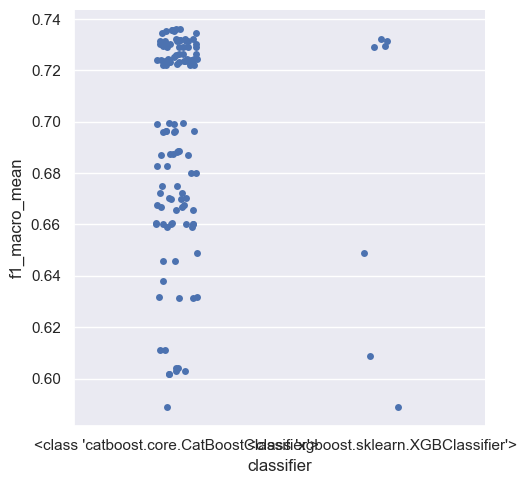

In [64]:

sns.catplot(data=sorted_results, x='classifier', y='f1_macro_mean')

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({'A':[2,3], 'B': [5,6]})

In [4]:
print(df.apply(lambda x : x + 1))

   A  B
0  3  6
1  4  7
